### B.Thanushan
### July 2021

Explanation video link : https://www.youtube.com/watch?v=kEpAu7267JY

In [172]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

we do feature selection because, having more features may lead to overfiiting and more features lead large computation power. Small subset feature will increase the learning speed and gives simpler model.<br/>
<br/>
Correlation between features means degree linear depennce between those two features. if they highly correlated then one feature can explain the other feature using a linear relationship.<br/>
<br/>
We remove correlated features because it affects our model. if we have correlated features in our model small change in data will have large change in weight vectors. Change in weight vectors will result in unstable model.


In [173]:
# >> FEATURE SELECTION << #
def removeCorrelatedFeatures(X):
    corr_threshold = 0.9
    corr = X.corr()
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped

In [174]:
def removeLessSignificantFeatures(X, Y):
    sl = 0.05 #significance level
    regression_ols = None
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()#return the index maximum p values of columns
        max_val = regression_ols.pvalues.max()#return the maximum p values of columns
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped

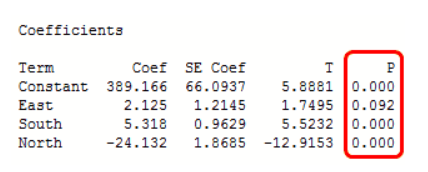

In [175]:
# >> MODEL TRAINING << #
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))# calculate the distance of the observation from decision boundary
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

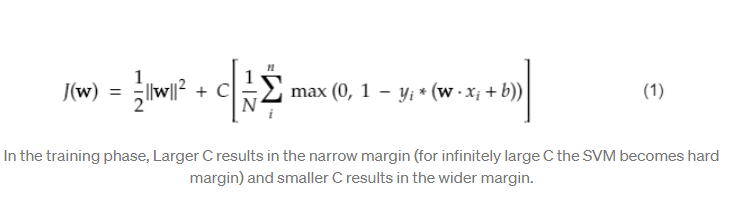

In [176]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
    if type(Y_batch) == np.int64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])# gives multidimensional array
    
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    #enumerate retuens indec and and distanc
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch)
        dw += di   
    dw = dw/len(Y_batch)  # average
    return dw

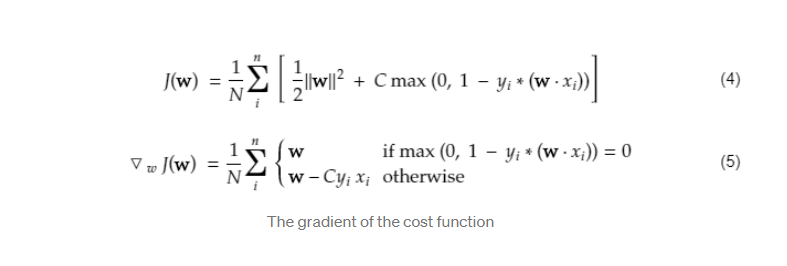

In [177]:
def sgd(features, outputs):
    max_epochs = 5000 #epoch means  number of passes of the entire training dataset the machine learning algorithm has completed
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

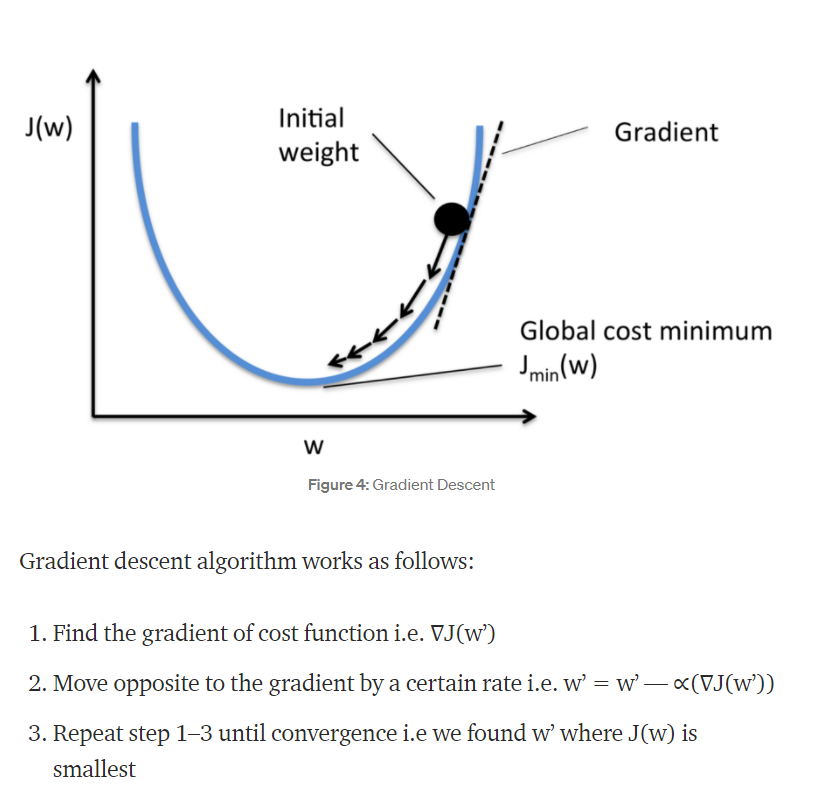

### Implement SVM in Breast Cancer Dataset

In [178]:
data = pd.read_csv('breast-cancer-wisconsin.csv') #read the dataset after handling missing values separately

In [179]:
data.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [180]:
#replace 2 with -1 and 4 with +1
data['class'].replace(2,-1,inplace=True)
data['class'].replace(4,1,inplace=True)
data['class']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
694   -1
695   -1
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [181]:
#drop id
data.drop(labels ='id', axis = 1,inplace=True)

In [182]:
# select the featurees to separte variable and response into separate variable
X = data.iloc[:,:-1]
Y = data.loc[:,['class']]

In [183]:
# filter features
removeCorrelatedFeatures(X)
removeLessSignificantFeatures(X, Y)

C:\Users\thanu\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\thanu\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['marginal_adhesion'], dtype='<U32')

In [184]:
X.head()

,clump_thickness,uniformity_of_cell_size,single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,2,1,3,1,1
1,5,4,7,10,3,2,1
2,3,1,2,2,3,1,1
3,6,8,3,4,3,7,1
4,4,1,2,1,3,1,1


In [185]:
# normalize data for better convergence and to prevent overflow
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

In [186]:
# insert 1 in every row for intercept b
X.insert(loc=len(X.columns), column='intercept', value=1)

In [187]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=(1/3), random_state=20)

In [188]:
y_test

,class
655,-1
440,1
633,1
416,1
10,-1
...,...
439,-1
369,-1
209,-1
370,-1


In [189]:
# set hyper-parameters
regularization_strength = 10000
learning_rate = 0.00001

In [190]:
W = sgd(X_train.to_numpy(), y_train.to_numpy())
print("weights are: {}".format(W))

Epoch is:1 and Cost is: 5699503.275826859
Epoch is:2 and Cost is: 6399335.658181201
Epoch is:4 and Cost is: 6560031.842951486
Epoch is:8 and Cost is: 7012137.8780808635
Epoch is:16 and Cost is: 7192300.723990435
Epoch is:32 and Cost is: 7278398.412880088
Epoch is:64 and Cost is: 7560233.406716345
Epoch is:128 and Cost is: 7419808.837108253
Epoch is:256 and Cost is: 7552785.998355909
Epoch is:512 and Cost is: 7641238.620498547
Epoch is:1024 and Cost is: 7448276.033979044
Epoch is:2048 and Cost is: 7804021.2811403265
Epoch is:4096 and Cost is: 7579238.600054795
Epoch is:4999 and Cost is: 7516211.709913423
weights are: [ 2.10124713  1.45397939  1.35016029  2.45956512  1.26382533  1.04794444
  1.37903657 -3.30109966]


In [191]:
y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test.to_numpy()[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)

In [195]:
print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("recall on test dataset: {}".format(recall_score(y_test, y_test_predicted)))
print("precision on test dataset: {}".format(precision_score(y_test, y_test_predicted)))

accuracy on test dataset: 0.9656652360515021
recall on test dataset: 0.9662921348314607
precision on test dataset: 0.945054945054945


In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
confusion_matrix(y_test, y_test_predicted)

array([[139,   5],
       [  3,  86]], dtype=int64)